# 정규화(원핫 인코딩 + 표준화)
## plant 데이터 prepocessing

In [1]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import module.etl as etl
from sklearn.metrics import roc_auc_score
pd.options.display.max_columns = 999

In [3]:
plant = pd.read_csv("data/31.finaldata_plant/plant_weather_sea.csv")
plant.drop(['MONTH', 'WEEK', 'HOUR'], axis=1, inplace=True)
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_IN,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,ASOS_TEMP,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-4.561169,1013.3,1016.0,0.0,7.750,0.475,0.900,128.30,1.200,142.725,143.0,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.0,0.8,60.0,4.0,9.0,1015.7,55.0,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.0,0.0,-8.790313,7.00,5.00
1,2016-04-01 00:00:00,1,2,14.00,23.00,11.00,9.00,42.00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-6.805218,1013.3,1016.0,0.0,7.750,0.475,0.900,128.30,1.200,142.725,143.0,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.0,0.8,60.0,4.0,9.0,1015.7,55.0,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.0,0.0,-9.332252,5.00,3.00
2,2016-04-01 00:00:00,1,3,13.00,32.00,10.00,9.00,42.00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-3.309370,1013.3,1016.0,0.0,7.750,0.475,0.900,128.30,1.200,142.725,143.0,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.0,0.8,60.0,4.0,9.0,1015.7,55.0,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.0,0.0,-5.933778,4.00,3.00
3,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-4.222123,1012.2,1014.9,0.0,5.625,0.525,0.975,164.25,1.500,142.750,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,228.0,0.3,10.0,4.0,9.8,1015.0,44.0,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.0,0.0,-7.667883,7.00,4.00
4,2016-04-01 03:00:00,1,2,12.00,32.00,9.00,7.00,59.00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-4.183719,1012.2,1014.9,0.0,5.625,0.525,0.975,164.25,1.500,142.750,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,228.0,0.3,10.0,4.0,9.8,1015.0,44.0,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.0,0.0,-6.809490,5.00,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:40:00,2,2,9.02,38.49,9.68,4.47,53.14,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,-4.368462,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0,2.3,0.0,283.6,2.1,1020.9,1024.2,60.2,22.3,36600.0,-3.778235,4.55,-0.66
349313,2019-03-31 23:40:00,2,3,8.26,39.62,9.57,4.47,53.14,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,-4.666200,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0,2.3,0.0,283.6,2.1,1020.9,1024.2,60.2,22.3,36600.0,-3.490602,3.79,-1.31
349314,2019-03-31 23:50:00,1,1,10.49,38.74,10.52,6.34,45.94,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,-2.967238,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0,1.9,0.0,326.5,2.1,1020.9,1024.2,62.5,22.3,36600.0,-2.940403,4.15,-0.03
349315,2019-03-31 23:50:00,1,2,10.55,36.69,11.01,6.34,45.94,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,-3.641345,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0,1.9,0.0,326.5,2.1,1020.9,1024.2,62.5,22.3,36600.0,-3.232477,4.21,-0.46


## 정규화 할 list 나누기

In [4]:
dummy_list = []
caling_list= ["AVG_PA", "AVG_PS", "HR1_RN", "AVG_TA", "AVG_WS", "MAX_WS", "MAX_WS_WD", "MAX_INS_WS", "MAX_INS_WS_WD", "WD_N1", "WS_N1", "GUST_WS_N1", "PA", "BUOY_HM", "BUOY_TA", "MAX_WH", "AVG_WH", "LB_WD", "LB_WS", "LB_MAX_INS_WD", "LB_MAX_IWS", "LB_TA", "LB_PS", "LB_HM"]

In [5]:
caling_list.extend(["DEW_POINT_COIL", "IN_OUT_TEM_D", "IN_COIL_TEM_D", "ASOS_RAIN_CUM", "ASOS_WIND_DIR", "ASOS_WIND_SPD", "ASOS_PRESS", "ASOS_SEA_PRESS", "ASOS_HUMID", "ASOS_SOLAR_RAD", "ASOS_SUNSHINE"])
caling_list

['AVG_PA',
 'AVG_PS',
 'HR1_RN',
 'AVG_TA',
 'AVG_WS',
 'MAX_WS',
 'MAX_WS_WD',
 'MAX_INS_WS',
 'MAX_INS_WS_WD',
 'WD_N1',
 'WS_N1',
 'GUST_WS_N1',
 'PA',
 'BUOY_HM',
 'BUOY_TA',
 'MAX_WH',
 'AVG_WH',
 'LB_WD',
 'LB_WS',
 'LB_MAX_INS_WD',
 'LB_MAX_IWS',
 'LB_TA',
 'LB_PS',
 'LB_HM',
 'ASOS_RAIN_CUM',
 'ASOS_WIND_DIR',
 'ASOS_WIND_SPD',
 'ASOS_PRESS',
 'ASOS_SEA_PRESS',
 'ASOS_HUMID',
 'ASOS_SOLAR_RAD',
 'ASOS_SUNSHINE',
 'DEW_POINT_COIL',
 'IN_OUT_TEM_D',
 'IN_COIL_TEM_D']

In [6]:
plant = etl.preprosess(plant, caling_list, dummy_list)
plant.head()

caling_category: ['TEM_IN', 'HUM_IN', 'TEM_COIL', 'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'AVG_PA', 'AVG_PS', 'HR1_RN', 'AVG_TA', 'AVG_WS', 'MAX_WS', 'MAX_WS_WD', 'MAX_INS_WS', 'MAX_INS_WS_WD', 'WD_N1', 'WS_N1', 'GUST_WS_N1', 'PA', 'BUOY_HM', 'BUOY_TA', 'MAX_WH', 'AVG_WH', 'LB_WD', 'LB_WS', 'LB_MAX_INS_WD', 'LB_MAX_IWS', 'LB_TA', 'LB_PS', 'LB_HM', 'ASOS_RAIN_CUM', 'ASOS_WIND_DIR', 'ASOS_WIND_SPD', 'ASOS_PRESS', 'ASOS_SEA_PRESS', 'ASOS_HUMID', 'ASOS_SOLAR_RAD', 'ASOS_SUNSHINE', 'DEW_POINT_COIL', 'IN_OUT_TEM_D', 'IN_COIL_TEM_D']
dummy_category: ['PLANT', 'LOC']


,MEA_DDHR,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_IN,ASOS_TEMP,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3
0,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-4.561169,7.5,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-0.185364,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,-1.265315,1.518995,2.696145,1,0,1,0,0
1,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-6.805218,7.5,-0.237239,-2.129562,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-0.185364,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,-1.312175,0.804837,1.511720,1,0,0,1,0
2,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-3.309370,7.5,-0.337508,-1.480329,-0.585582,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-0.185364,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,-1.018322,0.447758,1.511720,1,0,0,0,1
3,2016-04-01 03:00:00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-4.222123,7.5,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-0.185364,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,-1.168263,1.518995,2.103933,1,0,1,0,0
4,2016-04-01 03:00:00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-4.183719,7.5,-0.437777,-1.480329,-0.684520,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-0.185364,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,-1.094041,0.804837,1.511720,1,0,0,1,0


In [7]:
plant

,MEA_DDHR,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_IN,ASOS_TEMP,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3
0,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-4.561169,7.5,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-0.185364,1.391819,-0.921534,-0.383440,-0.363778,-1.607286,-0.877518,-0.870429,-1.265315,1.518995,2.696145,1,0,1,0,0
1,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-6.805218,7.5,-0.237239,-2.129562,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-0.185364,1.391819,-0.921534,-0.383440,-0.363778,-1.607286,-0.877518,-0.870429,-1.312175,0.804837,1.511720,1,0,0,1,0
2,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-3.309370,7.5,-0.337508,-1.480329,-0.585582,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-0.185364,1.391819,-0.921534,-0.383440,-0.363778,-1.607286,-0.877518,-0.870429,-1.018322,0.447758,1.511720,1,0,0,0,1
3,2016-04-01 03:00:00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-4.222123,7.5,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-0.185364,1.391819,-0.921534,-0.383440,-0.363778,-1.607286,-0.877518,-0.870429,-1.168263,1.518995,2.103933,1,0,1,0,0
4,2016-04-01 03:00:00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-4.183719,7.5,-0.437777,-1.480329,-0.684520,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-0.185364,1.391819,-0.921534,-0.383440,-0.363778,-1.607286,-0.877518,-0.870429,-1.094041,0.804837,1.511720,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:40:00,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,-4.368462,2.3,-0.736579,-1.012161,-0.617242,-0.825769,-0.467801,0.669890,0.661009,-0.147832,-0.750703,0.582840,0.554794,1.173689,0.754372,1.381086,1.230371,1.384445,1.064359,0.649668,-0.911473,-0.677958,2.099928,-0.278883,0.869325,1.211131,0.935346,1.312324,-0.675995,0.618521,-1.303263,-0.185364,0.938951,0.161914,0.718819,0.709988,-0.635240,2.016265,1.752256,-0.831941,0.644152,-0.655778,0,1,0,1,0
349313,2019-03-31 23:40:00,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,-4.666200,2.3,-0.812784,-0.930646,-0.628125,-0.825769,-0.467801,0.669890,0.661009,-0.147832,-0.750703,0.582840,0.554794,1.173689,0.754372,1.381086,1.230371,1.384445,1.064359,0.649668,-0.911473,-0.677958,2.099928,-0.278883,0.869325,1.211131,0.935346,1.312324,-0.675995,0.618521,-1.303263,-0.1

## test_data validation & 정규화 preprocessing

In [10]:
test_data = pd.read_csv("data/31.finaldata_plant/test_weather_sea.csv")
test_data.drop(['MONTH', 'WEEK', 'HOUR'], axis=1, inplace=True)
test_data

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_IN,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,ASOS_TEMP,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D
0,2019-04-01 00:00:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,-4.482439,1021.200000,1023.7,0.0,3.150000,2.125000,2.550,269.325000,4.250000,283.350000,336.0,7.0,9.9,1023.8,57.0,5.4,2.0,0.0,298.0,7.6,313.0,14.0,5.0,1023.2,50.0,2.0,0.0,330.3,1.7,1020.9,1024.2,63.0,22.30,36600.0,-2.746664,3.97,-1.93
1,2019-04-01 04:30:00,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,-0.247107,1021.633333,1024.1,0.0,4.958333,2.791667,3.275,288.208333,5.533333,274.216667,346.0,6.0,8.3,1023.1,64.0,5.3,1.0,0.0,305.0,6.9,300.0,9.0,5.0,1022.9,62.0,-1.2,0.0,98.1,0.3,1020.4,1023.7,84.7,0.00,0.0,0.451055,3.94,-0.76
2,2019-04-01 10:30:00,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,-3.163210,1022.066667,1024.5,0.0,6.766667,3.458333,4.000,307.091667,6.816667,265.083333,11.0,3.0,4.0,1025.3,65.0,6.0,1.0,0.0,326.0,4.5,300.0,9.0,5.4,1025.0,47.0,8.4,0.0,9.3,3.4,1021.8,1025.0,32.1,5.00,12360.0,-3.505440,-2.81,0.38
3,2019-04-01 11:00:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,-3.042714,1022.500000,1024.9,0.0,8.575000,4.125000,4.725,325.975000,8.100000,255.950000,27.0,2.0,3.3,1025.2,65.0,6.1,1.0,0.0,325.0,3.3,300.0,9.0,5.6,1024.9,46.0,9.2,0.0,355.5,3.2,1021.6,1024.8,25.6,6.18,14160.0,-4.329266,0.00,1.46
4,2019-04-01 13:30:00,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,-9.291221,1021.100000,1023.5,0.0,8.837500,4.075000,4.775,304.662500,7.850000,279.862500,272.0,2.0,4.0,1024.0,58.0,6.3,0.0,0.0,227.0,3.1,300.0,9.0,6.1,1023.6,38.0,9.8,0.0,349.8,3.2,1020.8,1024.0,24.9,12.76,22980.0,-11.413783,-0.73,2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,10.73,33.36,13.30,6.28,46.37,2020-03-30 03:00:00,NaN,2020-03-31 03:00:00,NaN,-4.745901,1020.500000,1023.0,0.0,1.450000,1.225000,1.400,252.425000,2.175000,263.025000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,345.0,4.2,338.0,8.0,4.8,1022.9,46.0,-0.8,0.0,47.8,0.5,1019.9,1023.1,79.8,0.00,0.0,-2.487578,4.45,-2.57
3535,2020-03-29 05:00:00,2,3,9.15,38.86,11.70,1.39,74.33,2020-03-30 05:00:00,NaN,2020-03-31 05:00:00,NaN,-4.125121,1020.700000,1023.2,0.0,0.175000,0.875000,1.225,163.250000,1.525000,184.275000,15.0,6.0,8.2,1022.9,52.0,6.3,0.0,0.0,5.0,3.5,338.0,8.0,4.2,1023.2,50.0,-1.4,0.0,326.3,0.4,1020.0,1023.2,84.8,0.00,0.0,-1.843282,7.76,-2.55
3536,2020-03-29 07:00:00,2,1,7.10,44.87,9.03,4.26,58.06,2020-03-30 07:00:00,NaN,2020-03-31 07:00:00,NaN,-4.064845,1021.300000,1023.8,0.0,-0.500000,1.200000,1.650,179.450000,2.375000,170.900000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,29.0,3.3,338.0,8.0,3.9,1023.9,46.0,-1.6,0.0,59.1,1.5,1020.5,1023.7,90.4,0.05,60.0,-2.307509,2.84,-1.93
3537,2020-03-29 11:30:00,1,1,13.54,33.49,12.20,12.90,33.67,2020-03-30 11:30:00,NaN,2020-03-31 11:30:00,NaN,-2.224313,1021.300000,1023.8,0.0,-0.500000,1.200000,1.650,179.450000,2.375000,170.900000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,149.0,0.9,338.0,8.0,7.2,1023.6,49.0,12.2,0.0,307.5,1.1,1019.4,1022.5,36.8,8.33,16260.0,-3.401824,0.64,1.34


In [11]:
test = etl.preprosess(test_data,caling_list,dummy_list)
test.head()

caling_category: ['TEM_IN', 'HUM_IN', 'TEM_COIL', 'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'AVG_PA', 'AVG_PS', 'HR1_RN', 'AVG_TA', 'AVG_WS', 'MAX_WS', 'MAX_WS_WD', 'MAX_INS_WS', 'MAX_INS_WS_WD', 'WD_N1', 'WS_N1', 'GUST_WS_N1', 'PA', 'BUOY_HM', 'BUOY_TA', 'MAX_WH', 'AVG_WH', 'LB_WD', 'LB_WS', 'LB_MAX_INS_WD', 'LB_MAX_IWS', 'LB_TA', 'LB_PS', 'LB_HM', 'ASOS_RAIN_CUM', 'ASOS_WIND_DIR', 'ASOS_WIND_SPD', 'ASOS_PRESS', 'ASOS_SEA_PRESS', 'ASOS_HUMID', 'ASOS_SOLAR_RAD', 'ASOS_SUNSHINE', 'DEW_POINT_COIL', 'IN_OUT_TEM_D', 'IN_COIL_TEM_D']
dummy_category: ['PLANT', 'LOC']


,MEA_DDHR,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_IN,ASOS_TEMP,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3
0,2019-04-01 00:00:00,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,-4.482439,2.0,-0.936761,-1.054636,-0.641253,-1.016510,-0.547359,0.719168,0.728424,-0.201451,-0.982463,0.193810,0.036838,1.217634,0.138219,1.473462,1.421462,1.080957,1.183797,0.735323,-1.467916,-0.912763,3.380703,-0.16337,0.963194,1.217574,1.039870,1.535735,-0.821423,0.687035,-1.459530,-0.243312,1.559953,-0.064784,0.786139,0.804603,-0.488267,1.992612,1.899260,-0.906625,0.598363,-1.476814,0,1,0,0,1
1,2019-04-01 04:30:00,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,-0.247107,-1.2,-0.720865,-0.449353,-0.562858,-0.817131,-0.319514,0.770127,0.774986,-0.201451,-0.787520,0.786256,0.619294,1.489210,0.775478,1.341007,1.513584,0.720434,0.723386,0.653443,-0.960107,-0.925726,1.467332,-0.16337,1.026285,0.963700,0.923601,0.243787,-0.821423,0.651951,-0.669360,-0.243312,-0.404293,-0.977051,0.726684,0.745901,0.545038,-0.837019,-0.818964,-0.587879,0.586896,-0.764695,1,0,0,1,0
2,2019-04-01 10:30:00,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,-3.163210,8.4,-0.788188,-1.017843,-0.758277,-0.166248,-1.690616,0.821087,0.821548,-0.201451,-0.592578,1.378701,1.201750,1.760786,1.412737,1.208552,-1.572493,-0.361134,-0.513971,0.910781,-0.887563,-0.834982,1.467332,-0.16337,1.215556,0.093277,0.923601,0.243787,-0.776169,0.897540,-1.657072,-0.243312,-1.155477,1.042967,0.893157,0.898525,-1.959654,-0.202573,0.098994,-0.982260,-1.993108,-0.070835,0,1,0,0,1
3,2019-04-01 11:00:00,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,-3.042714,9.2,-0.455058,-1.508418,-0.554905,-0.159918,-1.885695,0.872047,0.868110,-0.201451,-0.397635,1.971147,1.784207,2.032362,2.049996,1.076097,-1.425098,-0.721656,-0.715401,0.899084,-0.887563,-0.822018,1.467332,-0.16337,1.206543,-0.341934,0.923601,0.243787,-0.753542,0.885845,-1.722919,-0.243312,1.773127,0.912644,0.869375,0.875044,-2.269169,-0.052843,0.232677,-1.064378,-0.919062,0.586506,1,0,1,0,0
4,2019-04-01 13:30:00,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,-9.291221,9.8,-0.575774,-2.336624,-0.793497,-0.192621,-2.310636,0.707408,0.705143,-0.201451,-0.369337,1.926714,1.824376,1.725850,1.925855,1.422885,0.831883,-0.721656,-0.513971,0.758718,-1.395372,-0.796091,-0.446039,-0.16337,0.323276,-0.414470,0.923601,0.243787,-0.696975,0.733814,-2.249699,-0.243312,1.724909,0.912644,0.774248,0.781122,-2.302502,0.782088,0.887724,-1.770558,-1.198084,1.231674,0,1,1,0,0


# 데이터 분류

## plant_train 데이터
### train, test 데이터 분리

In [15]:
timeList = ['MEA_DDHR', 'X24H_TMA', 'X48H_TMA']
plant = plant.drop(timeList, axis=1)
plant.drop(['COND_LOC'], axis=1, inplace=True)
plant.head()

KeyError: "['MEA_DDHR' 'X24H_TMA' 'X48H_TMA'] not found in axis"

In [17]:
train_X = plant.drop(['X24H_COND_LOC', 'X48H_COND_LOC'], axis=1)
train_y = plant[['X24H_COND_LOC', 'X48H_COND_LOC']]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_X,train_y, test_size=0.3, shuffle=True, random_state=42, stratify=train_y)

In [19]:
y_train24 = y_train[['X24H_COND_LOC']]
y_train48 = y_train[['X48H_COND_LOC']]
y_val24 = y_val[['X24H_COND_LOC']]
y_val48 = y_val[['X48H_COND_LOC']]

## SMOTE를 활용한 오버샘플링
### 24시간 후 데이터 오버 샘플링

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled24, y_resampled24 = smote.fit_sample(X_train, y_train24)

In [21]:
X_resampled24.shape

(486272, 47)

### 48시간 후 데이터 오버 샘플링

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled48, y_resampled48 = smote.fit_sample(X_train, y_train48)

In [23]:
X_resampled48.shape

(486272, 47)

## SMOTE+ENN을 활용한 오버샘플링
### 24시간 후 데이터 오버 샘플링## 

In [144]:
from imblearn.combine import SMOTEENN

In [147]:
X_resampled24, y_resampled24 = SMOTEENN(random_state=42).fit_sample(X_train, y_train24)

In [148]:
X_resampled24.shape

(485459, 100)

### 48시간 후 데이터 오버 샘플링

In [149]:
X_resampled48, y_resampled48 = ADASYN(random_state=42).fit_sample(X_train, y_train48)

In [150]:
X_resampled48.shape

(486108, 100)

## test_data 만들기

In [29]:
timeList = ['MEA_DDHR', 'X24H_TMA', 'X48H_TMA']
test = test.drop(timeList, axis=1)
test_X = test.drop(['X24H_COND_LOC', 'X48H_COND_LOC'], axis=1)
test24_y = test[['X24H_COND_LOC']]
test48_y = test[['X48H_COND_LOC']]

# Random Forest
## 24시간 후 결로 예측

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_model24 = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model24.fit(X_resampled24, y_resampled24)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [39]:
y_pred24 = rf_model24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.86      0.82      0.84       594

    accuracy                           1.00    104796
   macro avg       0.93      0.91      0.92    104796
weighted avg       1.00      1.00      1.00    104796



## 48시간 결로 예측

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_model48 = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model48.fit(X_resampled48, y_resampled48)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [41]:
y_pred48 = rf_model48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.89      0.85      0.87       594

    accuracy                           1.00    104796
   macro avg       0.95      0.93      0.94    104796
weighted avg       1.00      1.00      1.00    104796



## 검증값 만들기

In [42]:
validation = etl.makeValiation(test_data, rf_model24, rf_model48, test_X)
validation

C:\Users\B0110\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\B0110\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\B0110\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,0
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,0
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,0,2019-04-03 10:30:00,0,0
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,0
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,0,2019-04-03 13:30:00,0,0
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,0
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,0,2020-03-31 11:30:00,0,0


In [43]:
def findCondRow24(validation):
    data = validation.loc[validation["X24H_COND_LOC"] == 1]
    return data
def findCondRow48(validation):
    data = validation.loc[validation["X48H_COND_LOC"] == 1]
    return data    

In [55]:
findCondRow24(validation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
2209,2019-12-09 04:30:00,2,2,2019-12-10 04:30:00,1,60,2019-12-11 04:30:00,0,0
2350,2019-12-16 10:00:00,1,2,2019-12-17 10:00:00,1,80,2019-12-18 10:00:00,0,20
2352,2019-12-16 10:00:00,1,3,2019-12-17 10:00:00,1,80,2019-12-18 10:00:00,0,20
2368,2019-12-16 12:00:00,1,2,2019-12-17 12:00:00,1,60,2019-12-18 12:00:00,0,30
2370,2019-12-16 12:00:00,1,3,2019-12-17 12:00:00,1,70,2019-12-18 12:00:00,0,20
2371,2019-12-16 12:30:00,1,1,2019-12-17 12:30:00,1,70,2019-12-18 12:30:00,0,30
2372,2019-12-16 12:30:00,2,1,2019-12-17 12:30:00,1,60,2019-12-18 12:30:00,0,0
2373,2019-12-16 12:30:00,2,2,2019-12-17 12:30:00,1,60,2019-12-18 12:30:00,0,0
2374,2019-12-16 12:30:00,1,3,2019-12-17 12:30:00,1,80,2019-12-18 12:30:00,0,30
2375,2019-12-16 13:00:00,2,1,2019-12-17 13:00:00,1,60,2019-12-18 13:00:00,0,10


In [56]:
findCondRow48(validation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
2353,2019-12-16 10:30:00,1,1,2019-12-17 10:30:00,0,30,2019-12-18 10:30:00,1,70


In [164]:
X_train.columns

Index(['COND_LOC', 'TEM_IN', 'HUM_IN', 'TEM_COIL', 'TEM_OUT_LOC1',
       'HUM_OUT_LOC1', 'AVG_PA', 'AVG_PS', 'HR1_RN', 'AVG_TA', 'AVG_WS',
       'MAX_WS', 'MAX_WS_WD', 'MAX_INS_WS', 'MAX_INS_WS_WD', 'WD_N1', 'WS_N1',
       'GUST_WS_N1', 'PA', 'BUOY_HM', 'BUOY_TA', 'MAX_WH', 'AVG_WH', 'LB_WD',
       'LB_WS', 'LB_MAX_INS_WD', 'LB_MAX_IWS', 'LB_TA', 'LB_PS', 'LB_HM',
       'DEW_POINT_COIL', 'IN_OUT_TEM_D', 'IN_COIL_TEM_D', 'PLANT_1', 'PLANT_2',
       'LOC_1', 'LOC_2', 'LOC_3'],
      dtype='object')

In [28]:
test_X.columns

NameError: name 'test_X' is not defined

# LightGBM
## 24 시간 결로 예측

In [24]:
from lightgbm import LGBMClassifier
lgbm_model24 = LGBMClassifier(n_estimators=1000, random_state=42, boost_from_average=False, max_depth=128, min_child_samples= 60, num_leaves =64,subsample=0.8 )
lgbm_model24.fit(X_resampled24, y_resampled24, early_stopping_rounds=100, eval_metric="auc",
           eval_set=[(X_resampled24, y_resampled24), (X_val, y_val24)])

lgbm_roc_score = roc_auc_score(y_val24, lgbm_model24.predict_proba(X_val)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	training's auc: 0.982424	training's binary_logloss: 0.609318	valid_1's auc: 0.966815	valid_1's binary_logloss: 0.609397
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.983983	training's binary_logloss: 0.540262	valid_1's auc: 0.972257	valid_1's binary_logloss: 0.540568
[3]	training's auc: 0.987099	training's binary_logloss: 0.481636	valid_1's auc: 0.972994	valid_1's binary_logloss: 0.482248
[4]	training's auc: 0.988512	training's binary_logloss: 0.432187	valid_1's auc: 0.978409	valid_1's binary_logloss: 0.43297
[5]	training's auc: 0.989368	training's binary_logloss: 0.389464	valid_1's auc: 0.980682	valid_1's binary_logloss: 0.390568
[6]	training's auc: 0.990494	training's binary_logloss: 0.352227	valid_1's auc: 0.982148	valid_1's binary_logloss: 0.353752
[7]	training's auc: 0.99252	training's binary_logloss: 0.31979	valid_1's auc: 0.985224	valid_1's binary_logloss: 0.321577
[8]	training's auc: 0.993187	training's binary_logloss: 0.291092	valid_1'

[67]	training's auc: 0.999981	training's binary_logloss: 0.00929224	valid_1's auc: 0.996135	valid_1's binary_logloss: 0.0124702
[68]	training's auc: 0.999983	training's binary_logloss: 0.00892677	valid_1's auc: 0.996085	valid_1's binary_logloss: 0.0121025
[69]	training's auc: 0.999984	training's binary_logloss: 0.00854936	valid_1's auc: 0.996196	valid_1's binary_logloss: 0.0117094
[70]	training's auc: 0.999985	training's binary_logloss: 0.00825475	valid_1's auc: 0.996277	valid_1's binary_logloss: 0.0114235
[71]	training's auc: 0.999986	training's binary_logloss: 0.00789975	valid_1's auc: 0.996304	valid_1's binary_logloss: 0.0110597
[72]	training's auc: 0.999987	training's binary_logloss: 0.00762218	valid_1's auc: 0.996238	valid_1's binary_logloss: 0.0107851
[73]	training's auc: 0.999988	training's binary_logloss: 0.00729252	valid_1's auc: 0.996193	valid_1's binary_logloss: 0.010429
[74]	training's auc: 0.999989	training's binary_logloss: 0.00703294	valid_1's auc: 0.996232	valid_1's bin

[134]	training's auc: 1	training's binary_logloss: 0.000965237	valid_1's auc: 0.996876	valid_1's binary_logloss: 0.00452511
[135]	training's auc: 1	training's binary_logloss: 0.000939939	valid_1's auc: 0.996865	valid_1's binary_logloss: 0.00451004
[136]	training's auc: 1	training's binary_logloss: 0.000912476	valid_1's auc: 0.996848	valid_1's binary_logloss: 0.00449645
[137]	training's auc: 1	training's binary_logloss: 0.000886537	valid_1's auc: 0.996864	valid_1's binary_logloss: 0.00448407
[138]	training's auc: 1	training's binary_logloss: 0.000861816	valid_1's auc: 0.996832	valid_1's binary_logloss: 0.00448113
[139]	training's auc: 1	training's binary_logloss: 0.000840358	valid_1's auc: 0.996869	valid_1's binary_logloss: 0.00447197
[140]	training's auc: 1	training's binary_logloss: 0.000816506	valid_1's auc: 0.996896	valid_1's binary_logloss: 0.00445658
[141]	training's auc: 1	training's binary_logloss: 0.000796782	valid_1's auc: 0.996944	valid_1's binary_logloss: 0.00445092
[142]	tr

[203]	training's auc: 1	training's binary_logloss: 0.000187754	valid_1's auc: 0.996846	valid_1's binary_logloss: 0.00434321
[204]	training's auc: 1	training's binary_logloss: 0.00018324	valid_1's auc: 0.99686	valid_1's binary_logloss: 0.00435194
[205]	training's auc: 1	training's binary_logloss: 0.000179223	valid_1's auc: 0.996848	valid_1's binary_logloss: 0.00435391
[206]	training's auc: 1	training's binary_logloss: 0.000176341	valid_1's auc: 0.996857	valid_1's binary_logloss: 0.004364
[207]	training's auc: 1	training's binary_logloss: 0.000173365	valid_1's auc: 0.996818	valid_1's binary_logloss: 0.00437004
[208]	training's auc: 1	training's binary_logloss: 0.000169902	valid_1's auc: 0.996817	valid_1's binary_logloss: 0.00437401
[209]	training's auc: 1	training's binary_logloss: 0.00016598	valid_1's auc: 0.996813	valid_1's binary_logloss: 0.0043726
[210]	training's auc: 1	training's binary_logloss: 0.000163069	valid_1's auc: 0.99681	valid_1's binary_logloss: 0.0043775
[211]	training's

[271]	training's auc: 1	training's binary_logloss: 4.6473e-05	valid_1's auc: 0.996955	valid_1's binary_logloss: 0.00469824
[272]	training's auc: 1	training's binary_logloss: 4.56534e-05	valid_1's auc: 0.996969	valid_1's binary_logloss: 0.00470368
Early stopping, best iteration is:
[172]	training's auc: 1	training's binary_logloss: 0.000375942	valid_1's auc: 0.996882	valid_1's binary_logloss: 0.00426284
ROC AUC: 0.9969


In [25]:
y_pred24 = lgbm_model24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.91      0.88      0.89       594

    accuracy                           1.00    104796
   macro avg       0.95      0.94      0.94    104796
weighted avg       1.00      1.00      1.00    104796



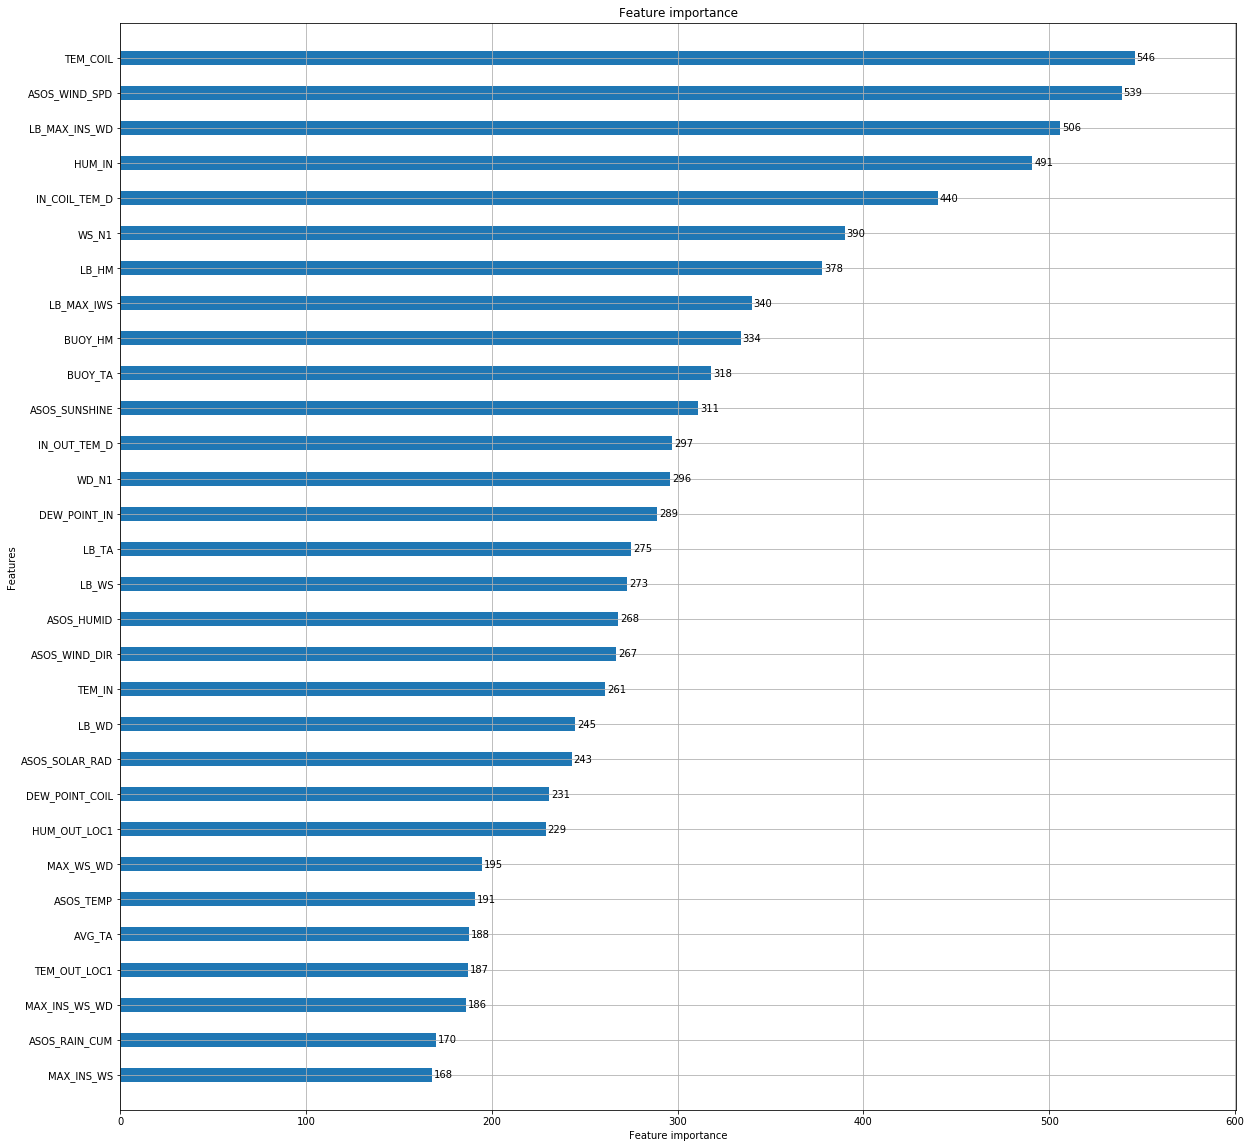

In [26]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 20))

plot_importance(lgbm_model24, ax=ax,  max_num_features=30,height=0.4)

In [30]:
lgbm_model24_df = pd.DataFrame(data=np.c_[test_X.columns.values, lgbm_model24.feature_importances_], columns=['variable', 'importance'])
lgbm_model24_df.sort_values(by="importance" ,ascending=False, inplace=True)
lgbm_model24_df.tail(20)

,variable,importance
15,MAX_INS_WS_WD,186
31,ASOS_RAIN_CUM,170
14,MAX_INS_WS,168
19,PA,151
35,ASOS_SEA_PRESS,151
11,AVG_WS,142
18,GUST_WS_N1,132
43,PLANT_2,132
12,MAX_WS,132
8,AVG_PS,120


## 48 시간 결로 예측

In [31]:
from lightgbm import LGBMClassifier
lgbm_model48 = LGBMClassifier(n_estimators=1000, random_state=42, boost_from_average=False, max_depth=128, min_child_samples= 60, num_leaves =64,subsample=0.8 )
lgbm_model48.fit(X_resampled48, y_resampled48, early_stopping_rounds=100, eval_metric="auc",
           eval_set=[(X_resampled48, y_resampled48), (X_val, y_val48)])

lgbm_roc_score = roc_auc_score(y_val48, lgbm_model48.predict_proba(X_val)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	training's auc: 0.978121	training's binary_logloss: 0.610028	valid_1's auc: 0.960355	valid_1's binary_logloss: 0.610321
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.987553	training's binary_logloss: 0.540634	valid_1's auc: 0.974565	valid_1's binary_logloss: 0.541042
[3]	training's auc: 0.990144	training's binary_logloss: 0.48249	valid_1's auc: 0.977124	valid_1's binary_logloss: 0.482711
[4]	training's auc: 0.991731	training's binary_logloss: 0.43327	valid_1's auc: 0.979654	valid_1's binary_logloss: 0.43351
[5]	training's auc: 0.992091	training's binary_logloss: 0.39146	valid_1's auc: 0.980122	valid_1's binary_logloss: 0.391861
[6]	training's auc: 0.992636	training's binary_logloss: 0.353672	valid_1's auc: 0.981455	valid_1's binary_logloss: 0.353885
[7]	training's auc: 0.993875	training's binary_logloss: 0.322236	valid_1's auc: 0.982723	valid_1's binary_logloss: 0.322556
[8]	training's auc: 0.99402	training's binary_logloss: 0.293623	valid_1's 

[67]	training's auc: 0.999979	training's binary_logloss: 0.011655	valid_1's auc: 0.996733	valid_1's binary_logloss: 0.0146322
[68]	training's auc: 0.99998	training's binary_logloss: 0.0112956	valid_1's auc: 0.996732	valid_1's binary_logloss: 0.0142689
[69]	training's auc: 0.999981	training's binary_logloss: 0.010851	valid_1's auc: 0.996714	valid_1's binary_logloss: 0.0137892
[70]	training's auc: 0.999982	training's binary_logloss: 0.0104949	valid_1's auc: 0.996761	valid_1's binary_logloss: 0.0134258
[71]	training's auc: 0.999983	training's binary_logloss: 0.0101007	valid_1's auc: 0.996761	valid_1's binary_logloss: 0.0129984
[72]	training's auc: 0.999984	training's binary_logloss: 0.00976436	valid_1's auc: 0.996775	valid_1's binary_logloss: 0.0126396
[73]	training's auc: 0.999985	training's binary_logloss: 0.00940578	valid_1's auc: 0.996727	valid_1's binary_logloss: 0.0122777
[74]	training's auc: 0.999985	training's binary_logloss: 0.00903354	valid_1's auc: 0.996719	valid_1's binary_log

[135]	training's auc: 1	training's binary_logloss: 0.00152724	valid_1's auc: 0.997288	valid_1's binary_logloss: 0.00456131
[136]	training's auc: 1	training's binary_logloss: 0.00148853	valid_1's auc: 0.997339	valid_1's binary_logloss: 0.00452804
[137]	training's auc: 1	training's binary_logloss: 0.00145565	valid_1's auc: 0.99735	valid_1's binary_logloss: 0.00451024
[138]	training's auc: 1	training's binary_logloss: 0.00140477	valid_1's auc: 0.997364	valid_1's binary_logloss: 0.00447212
[139]	training's auc: 1	training's binary_logloss: 0.00137687	valid_1's auc: 0.997368	valid_1's binary_logloss: 0.00445083
[140]	training's auc: 1	training's binary_logloss: 0.00135167	valid_1's auc: 0.997324	valid_1's binary_logloss: 0.00444421
[141]	training's auc: 1	training's binary_logloss: 0.00131604	valid_1's auc: 0.99731	valid_1's binary_logloss: 0.00442178
[142]	training's auc: 1	training's binary_logloss: 0.00128513	valid_1's auc: 0.99726	valid_1's binary_logloss: 0.00439476
[143]	training's au

[204]	training's auc: 1	training's binary_logloss: 0.000346441	valid_1's auc: 0.997601	valid_1's binary_logloss: 0.00385269
[205]	training's auc: 1	training's binary_logloss: 0.00034119	valid_1's auc: 0.997578	valid_1's binary_logloss: 0.00386112
[206]	training's auc: 1	training's binary_logloss: 0.000334893	valid_1's auc: 0.997545	valid_1's binary_logloss: 0.00386428
[207]	training's auc: 1	training's binary_logloss: 0.000329197	valid_1's auc: 0.997552	valid_1's binary_logloss: 0.00386642
[208]	training's auc: 1	training's binary_logloss: 0.000321723	valid_1's auc: 0.997535	valid_1's binary_logloss: 0.00386556
[209]	training's auc: 1	training's binary_logloss: 0.000315003	valid_1's auc: 0.99751	valid_1's binary_logloss: 0.00387163
[210]	training's auc: 1	training's binary_logloss: 0.000310301	valid_1's auc: 0.997531	valid_1's binary_logloss: 0.00387144
[211]	training's auc: 1	training's binary_logloss: 0.000304205	valid_1's auc: 0.997546	valid_1's binary_logloss: 0.00386989
[212]	trai

[271]	training's auc: 1	training's binary_logloss: 9.4847e-05	valid_1's auc: 0.997644	valid_1's binary_logloss: 0.0040852
[272]	training's auc: 1	training's binary_logloss: 9.2947e-05	valid_1's auc: 0.997655	valid_1's binary_logloss: 0.00408534
[273]	training's auc: 1	training's binary_logloss: 9.13476e-05	valid_1's auc: 0.997651	valid_1's binary_logloss: 0.00409019
[274]	training's auc: 1	training's binary_logloss: 8.94564e-05	valid_1's auc: 0.99767	valid_1's binary_logloss: 0.00409047
[275]	training's auc: 1	training's binary_logloss: 8.7714e-05	valid_1's auc: 0.997701	valid_1's binary_logloss: 0.00408396
[276]	training's auc: 1	training's binary_logloss: 8.63539e-05	valid_1's auc: 0.99767	valid_1's binary_logloss: 0.00408737
[277]	training's auc: 1	training's binary_logloss: 8.46623e-05	valid_1's auc: 0.997669	valid_1's binary_logloss: 0.00410246
[278]	training's auc: 1	training's binary_logloss: 8.34179e-05	valid_1's auc: 0.997641	valid_1's binary_logloss: 0.00410773
[279]	training

In [32]:
y_pred48 = lgbm_model48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.92      0.89      0.91       594

    accuracy                           1.00    104796
   macro avg       0.96      0.95      0.95    104796
weighted avg       1.00      1.00      1.00    104796



## 검증값 만들기

In [33]:
lgValiation =etl.makeValiation(test_data,lgbm_model24,lgbm_model48, test_X)
lgValiation

C:\Users\B0110\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\B0110\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\B0110\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,0
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,0
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,0,2019-04-03 10:30:00,0,0
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,0
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,0,2019-04-03 13:30:00,0,0
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,0
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,0,2020-03-31 11:30:00,0,0


In [44]:
findCondRow24(validation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
2363,2019-12-16 11:30:00,1,2,2019-12-17 11:30:00,1,70,2019-12-18 11:30:00,0,20
2364,2019-12-16 11:30:00,2,2,2019-12-17 11:30:00,1,70,2019-12-18 11:30:00,0,0
2365,2019-12-16 11:30:00,1,3,2019-12-17 11:30:00,1,60,2019-12-18 11:30:00,0,20
2366,2019-12-16 12:00:00,1,1,2019-12-17 12:00:00,1,70,2019-12-18 12:00:00,0,20
2368,2019-12-16 12:00:00,1,2,2019-12-17 12:00:00,1,70,2019-12-18 12:00:00,0,30
2370,2019-12-16 12:00:00,1,3,2019-12-17 12:00:00,1,70,2019-12-18 12:00:00,0,30
2371,2019-12-16 12:30:00,1,1,2019-12-17 12:30:00,1,60,2019-12-18 12:30:00,0,10
2374,2019-12-16 12:30:00,1,3,2019-12-17 12:30:00,1,60,2019-12-18 12:30:00,0,10
2376,2019-12-16 13:00:00,1,2,2019-12-17 13:00:00,1,80,2019-12-18 13:00:00,0,0
2378,2019-12-16 13:00:00,1,3,2019-12-17 13:00:00,1,80,2019-12-18 13:00:00,0,0


In [45]:
findCondRow48(lgValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
1989,2019-11-16 23:30:00,1,3,2019-11-17 23:30:00,1,55,2019-11-18 23:30:00,1,64
2051,2019-11-22 03:30:00,1,3,2019-11-23 03:30:00,0,0,2019-11-24 03:30:00,1,76
2302,2019-12-15 09:30:00,2,1,2019-12-16 09:30:00,0,3,2019-12-17 09:30:00,1,59
2303,2019-12-15 09:30:00,1,2,2019-12-16 09:30:00,1,86,2019-12-17 09:30:00,1,91
2307,2019-12-15 10:00:00,1,2,2019-12-16 10:00:00,1,75,2019-12-17 10:00:00,1,55
2309,2019-12-15 10:00:00,1,3,2019-12-16 10:00:00,1,94,2019-12-17 10:00:00,1,80
2312,2019-12-15 10:30:00,1,2,2019-12-16 10:30:00,0,22,2019-12-17 10:30:00,1,79
2314,2019-12-15 10:30:00,1,3,2019-12-16 10:30:00,1,63,2019-12-17 10:30:00,1,81
2315,2019-12-15 11:00:00,1,1,2019-12-16 11:00:00,1,88,2019-12-17 11:00:00,1,54
2316,2019-12-15 11:00:00,2,1,2019-12-16 11:00:00,0,19,2019-12-17 11:00:00,1,65


In [46]:
etl.save_validation_csv(lgValiation,"lgbm")

# XGBOOST
## 24 시간 결로 예측

In [47]:
from xgboost import XGBClassifier
xgb_model24 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
xgb_model24.fit(X_resampled24, y_resampled24,  early_stopping_rounds=100,eval_set=[(X_val, y_val24)], eval_metric="logloss",  verbose=True)

C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-logloss:0.606198
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.535851
[2]	validation_0-logloss:0.476221
[3]	validation_0-logloss:0.424985
[4]	validation_0-logloss:0.381101
[5]	validation_0-logloss:0.34325
[6]	validation_0-logloss:0.311897
[7]	validation_0-logloss:0.282776
[8]	validation_0-logloss:0.257712
[9]	validation_0-logloss:0.234817
[10]	validation_0-logloss:0.214537
[11]	validation_0-logloss:0.196251
[12]	validation_0-logloss:0.178865
[13]	validation_0-logloss:0.163748
[14]	validation_0-logloss:0.150499
[15]	validation_0-logloss:0.138564
[16]	validation_0-logloss:0.127814
[17]	validation_0-logloss:0.117961
[18]	validation_0-logloss:0.109349
[19]	validation_0-logloss:0.10096
[20]	validation_0-logloss:0.093465
[21]	validation_0-logloss:0.086732
[22]	validation_0-logloss:0.08071
[23]	validation_0-logloss:0.075257
[24]	validation_0-logloss:0.069963
[25]	validation_0-logloss:0.065012
[26]	validation_0-logloss:0.060565

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [48]:
y_pred24 = xgb_model24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.82      0.89      0.85       594

    accuracy                           1.00    104796
   macro avg       0.91      0.94      0.93    104796
weighted avg       1.00      1.00      1.00    104796



## 48 시간 결로 예측

In [ ]:
from xgboost import XGBClassifier
xgb_model48 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
xgb_model48.fit(X_resampled48, y_resampled48,  early_stopping_rounds=100,eval_set=[(X_val, y_val48)], eval_metric="logloss",  verbose=True)

[0]	validation_0-logloss:0.609793
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.539793
[2]	validation_0-logloss:0.483282
[3]	validation_0-logloss:0.433844
[4]	validation_0-logloss:0.391533
[5]	validation_0-logloss:0.355033
[6]	validation_0-logloss:0.32482
[7]	validation_0-logloss:0.29796
[8]	validation_0-logloss:0.273368
[9]	validation_0-logloss:0.249707
[10]	validation_0-logloss:0.229869
[11]	validation_0-logloss:0.214086


In [ ]:
y_pred48 = xgb_model48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

## 검증 값 만들기

In [ ]:
xgValiation= etl.makeValiation(test_data, xgb_model24, xgb_model48, test_X)
xgValiation

In [ ]:
findCondRow24(xgValiation)

In [ ]:
findCondRow48(xgValiation)

In [ ]:
etl.save_validation_csv(xgValiation,"xgboost")

# KNN
## 24시간 결로 예측

In [41]:
from sklearn.neighbors import KNeighborsClassifier
neigh24 = KNeighborsClassifier(n_neighbors=3)
neigh24.fit(X_train24, y_train24)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [42]:
y_pred24 = neigh24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104055
         1.0       1.00      1.00      1.00    104266

    accuracy                           1.00    208321
   macro avg       1.00      1.00      1.00    208321
weighted avg       1.00      1.00      1.00    208321



## 48시간 결로 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh48 = KNeighborsClassifier(n_neighbors=3)
neigh48.fit(X_train48, y_train48)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
y_pred48 = neigh48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

In [ ]:
knnValiation=makeValiation(neigh24,neigh48)
knnValiation

In [ ]:
findCondRow24(knnValiation)

In [ ]:
findCondRow48(knnValiation)